In [1]:
import os, sys
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from src.utils.utils import *

## Criar os DataFrames

In [2]:
full_dictionary = load_json("full_dictionary_metadata", "../../metadata")
ddsm_dictionary = load_json("dictionary_metadata_ddsm", "../../metadata/DDSM")
cmmd_dictionary = load_json("dictionary_metadata_cmmd", "../../metadata/CMMD")

def create_df(dictionary): 
    keys = [key for key in dictionary.keys()]
    values = [value for value in dictionary.values()]

    df = pd.DataFrame({"tag": keys, "frequencia": values})
    return df

df_cmmd = create_df(cmmd_dictionary)
df_ddsm = create_df(ddsm_dictionary)
df_full = create_df(full_dictionary)

## Verificar Frequência da valores de cada tag em cada banco

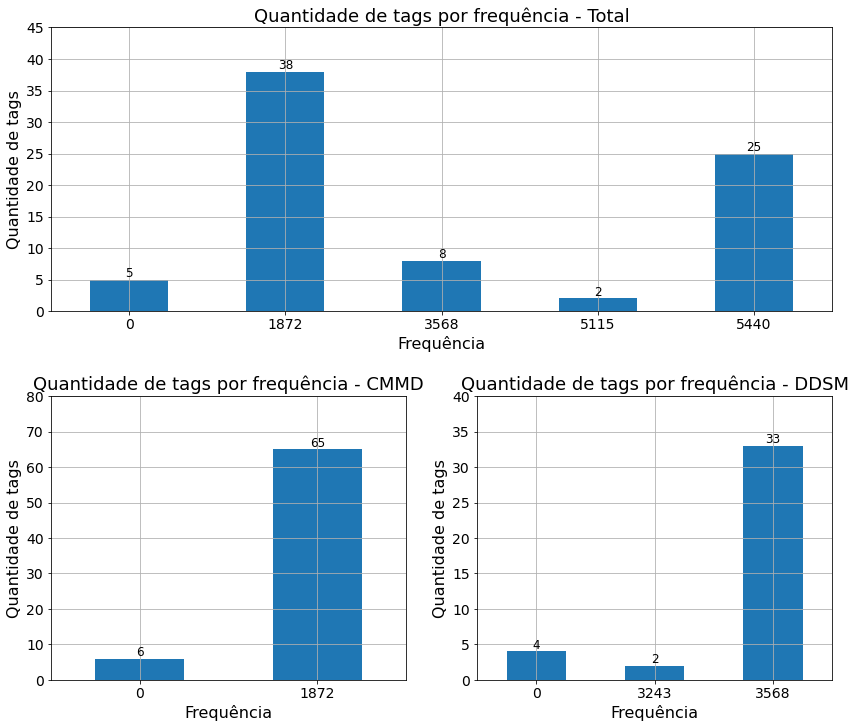

In [3]:
full = df_full.groupby("frequencia", as_index=False).count()
ddsm = df_ddsm.groupby("frequencia", as_index=False).count()
cmmd = df_cmmd.groupby("frequencia", as_index=False).count()

fig = plt.figure(figsize=(14, 12))
gs = fig.add_gridspec(2, 2)

ax1 = plt.subplot(gs[0, ::])
ax = full.plot.bar(x='frequencia', y='tag', ax=ax1, rot=0, legend=False, yticks=range(0, 50, 5), fontsize=14)
ax1.set_title("Quantidade de tags por frequência - Total", size=18)
ax1.set_xlabel("Frequência", size=16)
ax1.set_ylabel("Quantidade de tags", size=16)
ax1.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")
plt.grid()

ax2 = plt.subplot(gs[1:, :1:])
ax = cmmd.plot(kind='bar', x='frequencia', y='tag', ax=ax2, rot=0, legend=False, fontsize=14,  yticks=range(0, 90, 10))
ax2.set_title("Quantidade de tags por frequência - CMMD", size=18)
ax2.set_xlabel("Frequência", size=16)
ax2.set_ylabel("Quantidade de tags", size=16)
ax2.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")
plt.grid()

ax3 = plt.subplot(gs[1:, 1::])
ax = ddsm.plot(kind='bar', x='frequencia', y='tag', ax=ax3, rot=0, legend=False, fontsize=14,  yticks=range(0, 45, 5))
ax3.set_title("Quantidade de tags por frequência - DDSM", size=18)
ax3.set_xlabel("Frequência", size=16)
ax3.set_ylabel("Quantidade de tags", size=16)
ax3.bar_label(ax.containers[0], fmt="%.01d", size=12, label_type="edge")
plt.grid()

plt.subplots_adjust(wspace=.2, hspace=.3)
plt.show()

## Buscar tags pela frequência

In [9]:
def buscar_tags(df: pd.DataFrame, freq: int) -> pd.DataFrame:
    """Retorna um DataFrame com as tags que contém a frequência informada"""
    return df.loc[df['frequencia'] == freq].copy(deep=True).reset_index(drop=True)

"""---Opcões de parâmetros para função buscar_tags---
    Dataframe: df_full - Frequencias possíveis: [0, 1872, 3568, 5115, 5440]
    Dataframe: df_cmmd - Frequencias possíveis: [0, 1872]
    Dataframe: df_ddsm - Frequencias possíveis: [0, 3243, 3568]
"""
buscar_tags(df_full, 5440)

,tag,frequencia
0,"study_instance_uid (0020, 000d)",5440
1,"private_tag_data (0013, 1013)",5440
2,"patient_id (0010, 0020)",5440
3,"modality (0008, 0060)",5440
4,"body_part_examined (0018, 0015)",5440
5,"columns (0028, 0011)",5440
6,"sop_class_uid (0008, 0016)",5440
7,"content_date (0008, 0023)",5440
8,"patient's_name (0010, 0010)",5440
9,"private_creator (0013, 0010)",5440
